# Heart Disease UCI

## About this Notebook
Here you can find data analysis and modelling of **Heart Disease UCI** dataset, which can be found at https://www.kaggle.com/ronitf/heart-disease-uci.

The data set consists of 14 atributes - information about patiens.

The goal of modelling is to predit if a patient has a heart disease or not.

We will use ML and DNN for our predictions.

# 1. Data Description and Imports

## 1.1 Atribute Information
We will try to predict the **target** variable. It refers to the presence of heart disease in the patient. 
It is not specified in the data set description, if 1 is for precense or for no precense. After looking at the original dataset at https://archive.ics.uci.edu/ml/datasets/Heart+Disease we can say, that 1 is for no precense of  a heart disease, and 0 is for precense.

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type: -Value 1: typical angina; -Value 2: atypical angina; -Value 3: non-anginal pain; -Value 4: asymptomatic

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl  
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. restecg: resting electrocardiographic results 
-- Value 0: normal 
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria ) 
8. thalach: maximum heart rate achieved  
9. exang: exercise induced angina (1 = yes; 0 = no) 
10. oldpeak = ST depression induced by exercise relative to rest 
11. slope: the slope of the peak exercise ST segment 
-- Value 1: upsloping 
-- Value 2: flat 
-- Value 3: downsloping 
12. ca: number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. target: 0 (presence) is subject to possible heart disease; 1 (no precence) - healthy

## 1.2 Libraries and Data imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.externals import joblib
import tensorflow as tf

%matplotlib inline

RANDOM_STATE = 42
TRESHOLD = 0.5
LR = 1e-3
N_EPOCHS = 100
N_EPOCHS_KF = 20
BATCH_SIZE = 32
SAVE_PATH = './saved_models/'

In [2]:
tf.__version__

'2.0.0-beta1'

In [3]:
heart_df = pd.read_csv('heart.csv')

# 2. Exploratory Data Analysis

## 2.1 Data Exploration

In [4]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
# Renaming Collumns into more readable form
heart_df.columns = (['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
                     'chol', 'fasting_blood_sugar', 'restecg', 'max_heart_rate',
                     'exang', 'oldpeak', 'slope', 'num_of_major_vessels', 'thal', 'target'])

In [7]:
heart_df.head().T

,0,1,2,3,4
age,63.0,37.0,41.0,56.0,57.0
sex,1.0,1.0,0.0,1.0,0.0
chest_pain_type,3.0,2.0,1.0,1.0,0.0
resting_blood_pressure,145.0,130.0,130.0,120.0,120.0
chol,233.0,250.0,204.0,236.0,354.0
fasting_blood_sugar,1.0,0.0,0.0,0.0,0.0
restecg,0.0,1.0,0.0,1.0,1.0
max_heart_rate,150.0,187.0,172.0,178.0,163.0
exang,0.0,0.0,0.0,0.0,1.0
oldpeak,2.3,3.5,1.4,0.8,0.6


In [8]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                       303 non-null int64
sex                       303 non-null int64
chest_pain_type           303 non-null int64
resting_blood_pressure    303 non-null int64
chol                      303 non-null int64
fasting_blood_sugar       303 non-null int64
restecg                   303 non-null int64
max_heart_rate            303 non-null int64
exang                     303 non-null int64
oldpeak                   303 non-null float64
slope                     303 non-null int64
num_of_major_vessels      303 non-null int64
thal                      303 non-null int64
target                    303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [9]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain_type,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
max_heart_rate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
heart_df.nunique().reset_index(name='Number of unique')

,index,Number of unique
0,age,41
1,sex,2
2,chest_pain_type,4
3,resting_blood_pressure,49
4,chol,152
5,fasting_blood_sugar,2
6,restecg,3
7,max_heart_rate,91
8,exang,2
9,oldpeak,40


## 2.2 Data Visualization

### 2.2.1 Pairplot

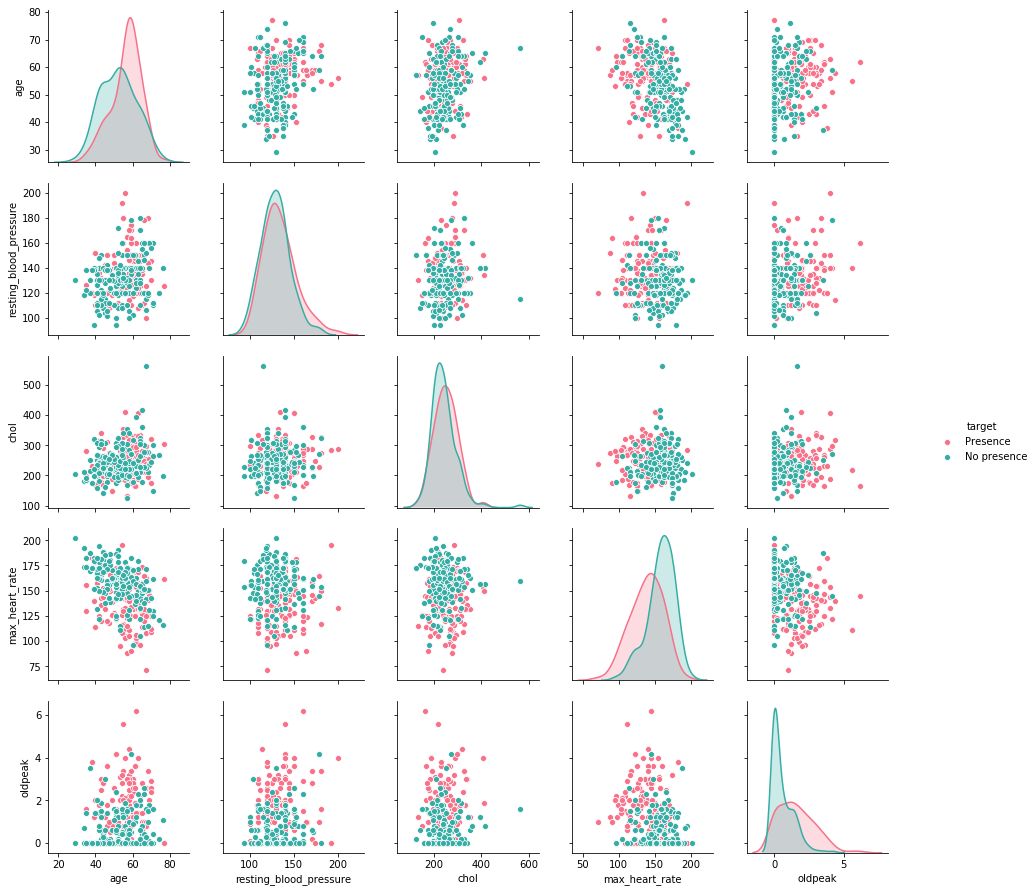

In [22]:
g = (sns.pairplot(heart_df,
                  vars=['age', 'resting_blood_pressure', 'chol', 'max_heart_rate', 'oldpeak'],
                  hue='target',
                  palette='husl'))
g._legend.texts[0].set_text('Presence')
g._legend.texts[1].set_text('No presence')
g._legend.set_bbox_to_anchor((1.1, 0.5))

### 2.2.2 Correlation Matrix

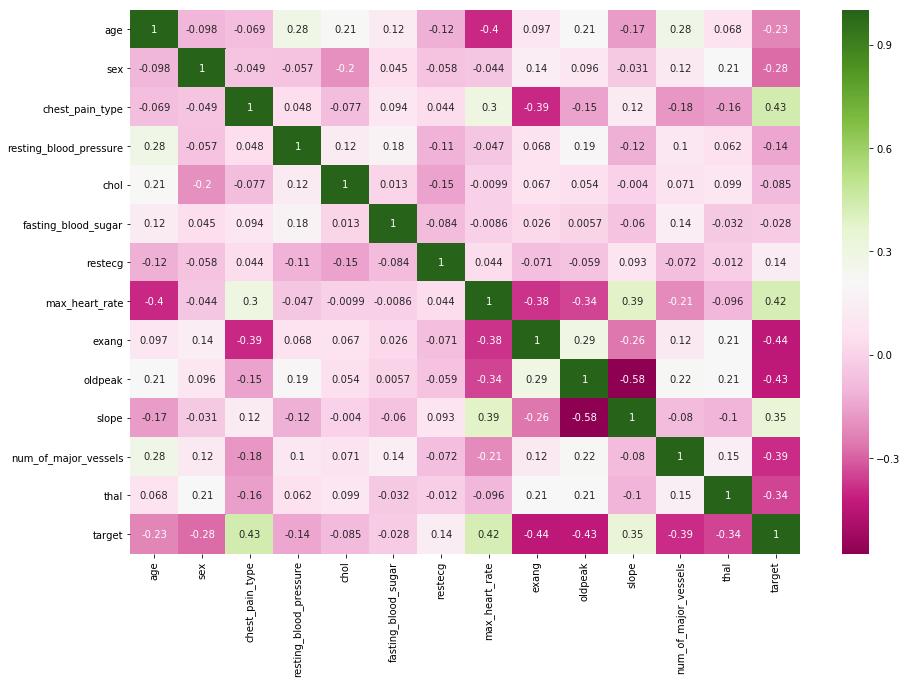

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(heart_df.corr(), annot=True, cmap='PiYG')

### 2.2.3 Age. Sex

Text(0.5, 1.0, 'Distribution of patiens by age')

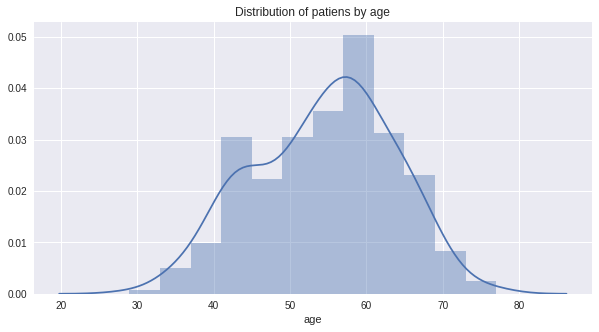

In [25]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,5)) 

sns.distplot(heart_df['age'])
plt.title('Distribution of patiens by age')

Text(0.5, 1.0, 'Total Number of Patients based on sex and age')

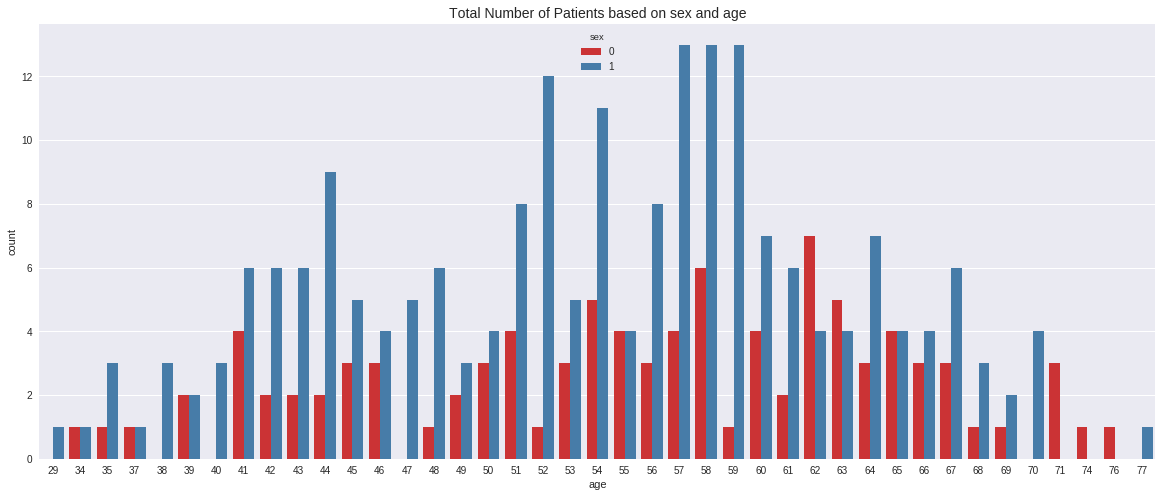

In [26]:
plt.figure(figsize=(20,8))
sns.countplot(x='age', hue='sex', data=heart_df, palette='Set1')
plt.title('Total Number of Patients based on sex and age', fontsize=14)

Text(0.5, 0, 'Target. 1 -> no disease')

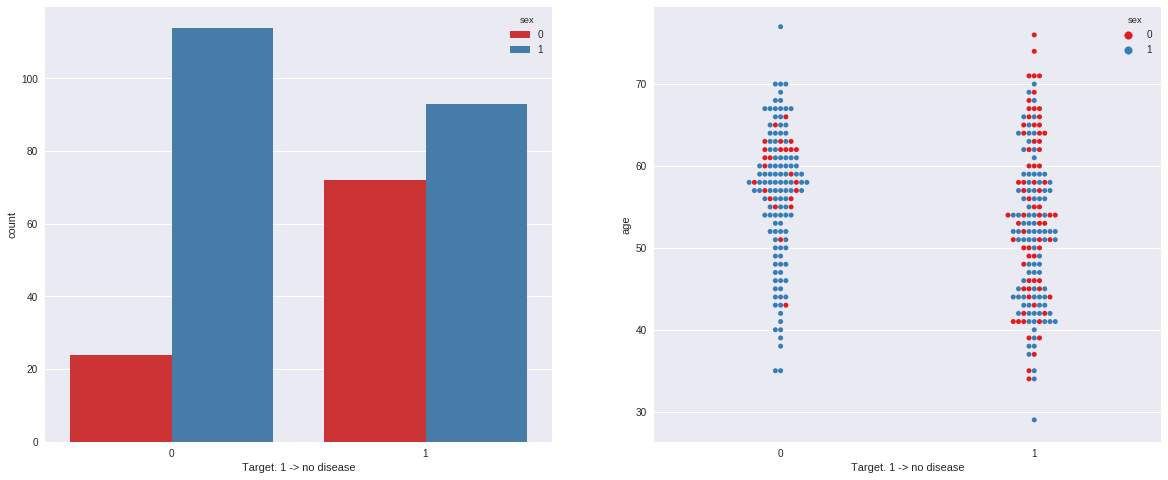

In [27]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
(sns.countplot(heart_df['target'].sort_values(),
               hue=heart_df['sex'].sort_values(),
               palette='Set1', ax=ax[0]))
(sns.swarmplot(x='target', y='age', hue='sex', data=heart_df, palette='Set1', ax=ax[1]))
ax[0].set_xlabel('Target. 1 -> no disease')
ax[1].set_xlabel('Target. 1 -> no disease')

### 2.2.4 Resting blood pressure (in mm Hg on admission to the hospital)

Text(0.5, 0, 'Target. 1 -> no disease')

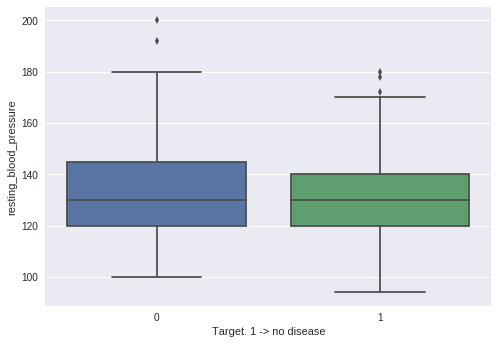

In [28]:
sns.boxplot(heart_df['target'], heart_df['resting_blood_pressure'])
plt.xlabel('Target. 1 -> no disease')

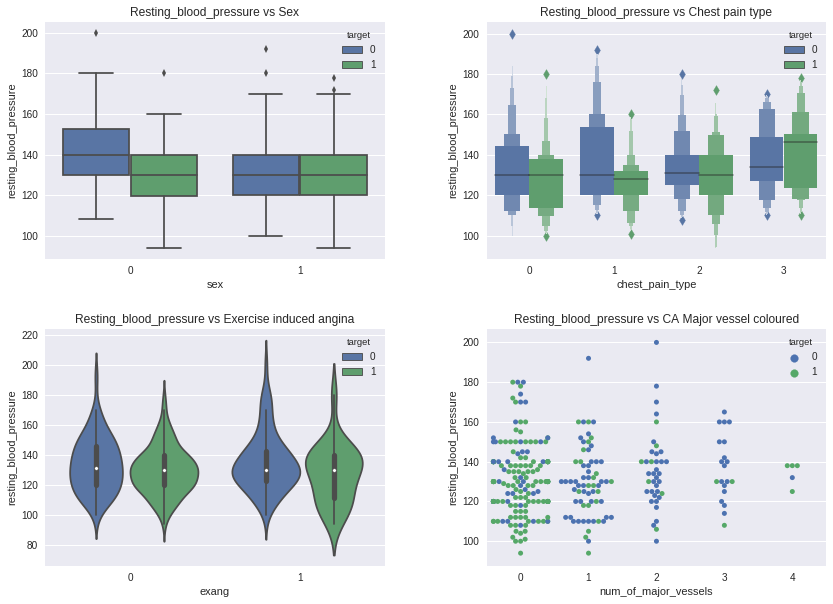

In [29]:
fig,ax = plt.subplots(2,2,figsize=(14,10))
sns.boxplot(y='resting_blood_pressure',data=heart_df,x='sex',hue='target', ax=ax[0,0])
ax[0,0].set_title('Resting_blood_pressure vs Sex')
sns.boxenplot(y='resting_blood_pressure',data=heart_df,x='chest_pain_type',hue='target',ax=ax[0,1])
ax[0,1].set_title('Resting_blood_pressure vs Chest pain type')
sns.violinplot(y='resting_blood_pressure',data=heart_df,x='exang',hue='target',ax=ax[1,0])
ax[1,0].set_title('Resting_blood_pressure vs Exercise induced angina')
sns.swarmplot(y='resting_blood_pressure',data=heart_df,x='num_of_major_vessels',hue='target',ax=ax[1,1])
ax[1,1].set_title('Resting_blood_pressure vs CA Major vessel coloured')
plt.subplots_adjust(hspace=0.3, wspace=0.3)

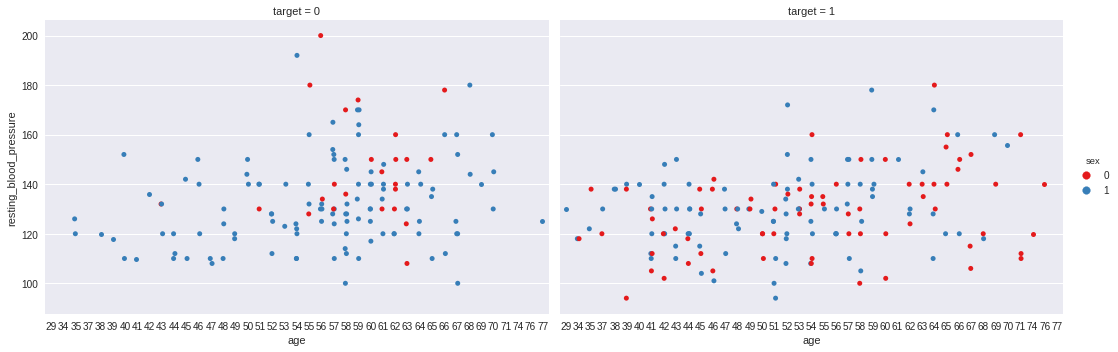

In [30]:
(sns.catplot(y='resting_blood_pressure',
             data=heart_df,
             x='age',
             hue='sex',
             col='target',
             palette='Set1',
             height=5,
             aspect=1.5,))

### 2.2.5 chol: serum cholestoral in mg/dl

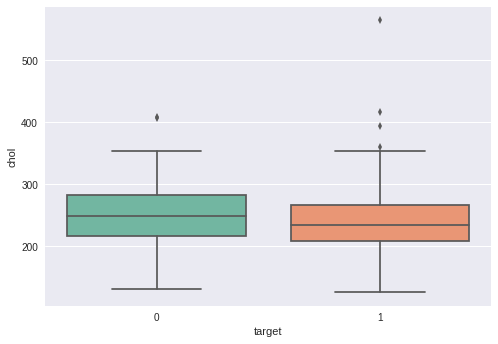

In [31]:
sns.boxplot(heart_df['target'], heart_df['chol'], palette='Set2')

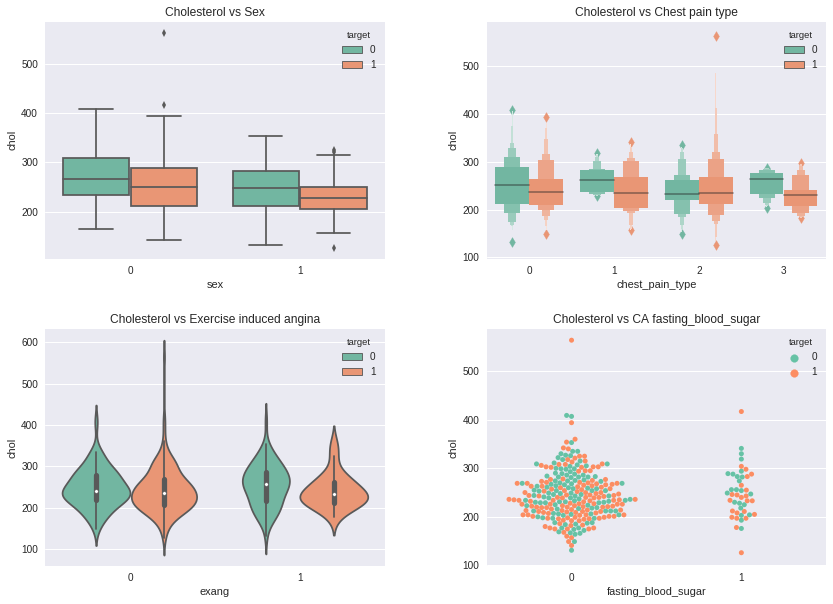

In [32]:
fig,ax = plt.subplots(2,2,figsize=(14,10))
sns.boxplot(y='chol',data=heart_df,x='sex',hue='target', ax=ax[0,0], palette='Set2')
ax[0,0].set_title('Cholesterol vs Sex')
sns.boxenplot(y='chol',data=heart_df,x='chest_pain_type',hue='target',ax=ax[0,1], palette='Set2')
ax[0,1].set_title('Cholesterol vs Chest pain type')
sns.violinplot(y='chol',data=heart_df,x='exang',hue='target',ax=ax[1,0], palette='Set2')
ax[1,0].set_title('Cholesterol vs Exercise induced angina')
sns.swarmplot(y='chol',data=heart_df,x='fasting_blood_sugar',hue='target',ax=ax[1,1], palette='Set2')
ax[1,1].set_title('Cholesterol vs CA fasting_blood_sugar')
plt.subplots_adjust(hspace=0.3, wspace=0.3)

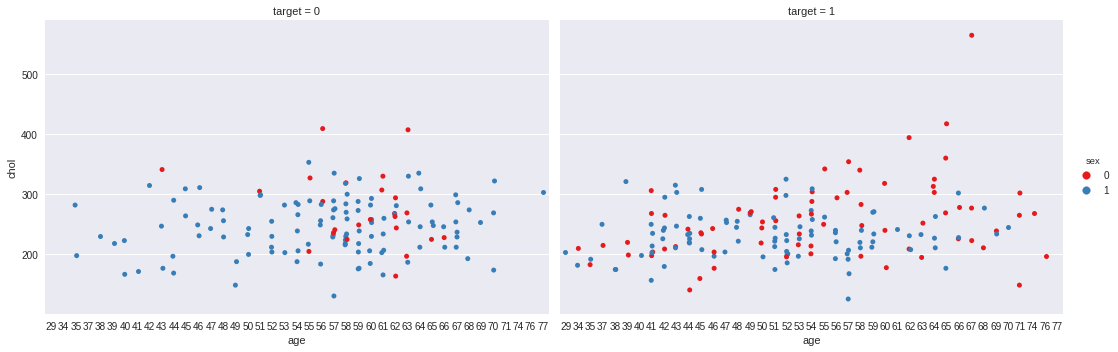

In [33]:
(sns.catplot(y='chol',
             data=heart_df,
             x='age',
             hue='sex',
             col='target',
             palette='Set1',
             height=5, aspect=1.5))

### 2.2.6 maximum heart rate achieved

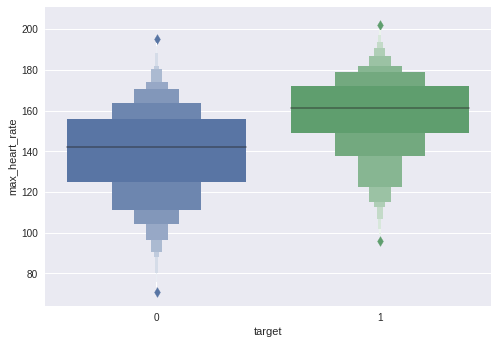

In [34]:
sns.boxenplot(heart_df['target'], heart_df['max_heart_rate'])

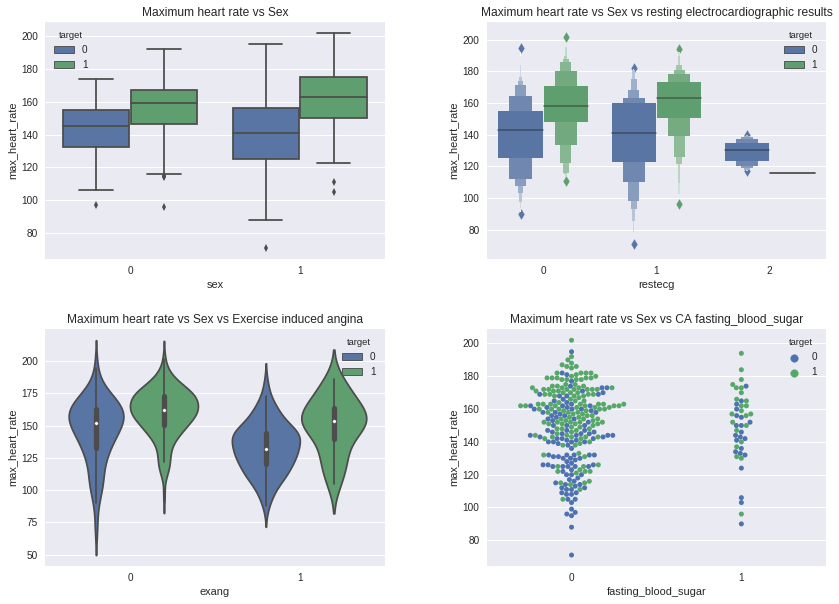

In [35]:
fig,ax = plt.subplots(2,2,figsize=(14,10))
sns.boxplot(y='max_heart_rate',data=heart_df,x='sex',hue='target', ax=ax[0,0])
ax[0,0].set_title('Maximum heart rate vs Sex')
sns.boxenplot(y='max_heart_rate',data=heart_df,x='restecg',hue='target',ax=ax[0,1])
ax[0,1].set_title('Maximum heart rate vs Sex vs resting electrocardiographic results')
sns.violinplot(y='max_heart_rate',data=heart_df,x='exang',hue='target',ax=ax[1,0])
ax[1,0].set_title('Maximum heart rate vs Sex vs Exercise induced angina')
sns.swarmplot(y='max_heart_rate',data=heart_df,x='fasting_blood_sugar',hue='target',ax=ax[1,1])
ax[1,1].set_title('Maximum heart rate vs Sex vs CA fasting_blood_sugar')
plt.subplots_adjust(hspace=0.3, wspace=0.3)

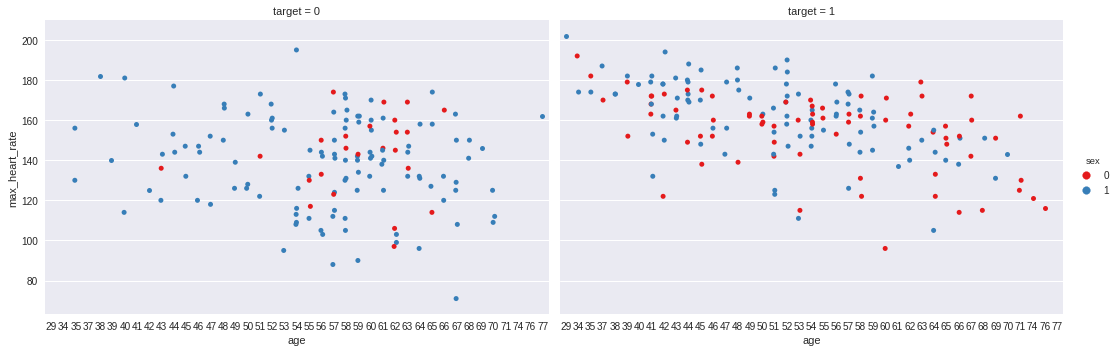

In [36]:
(sns.catplot(y='max_heart_rate',
             data=heart_df,
             x='age',
             hue='sex',
             col='target',
             palette='Set1',
             height=5, aspect=1.5))

### 2.2.7 oldpeak - ST depression induced by exercise relative to rest

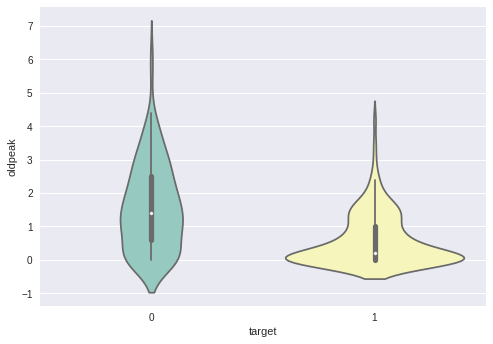

In [37]:
sns.violinplot(heart_df['target'], heart_df['oldpeak'], palette='Set3')

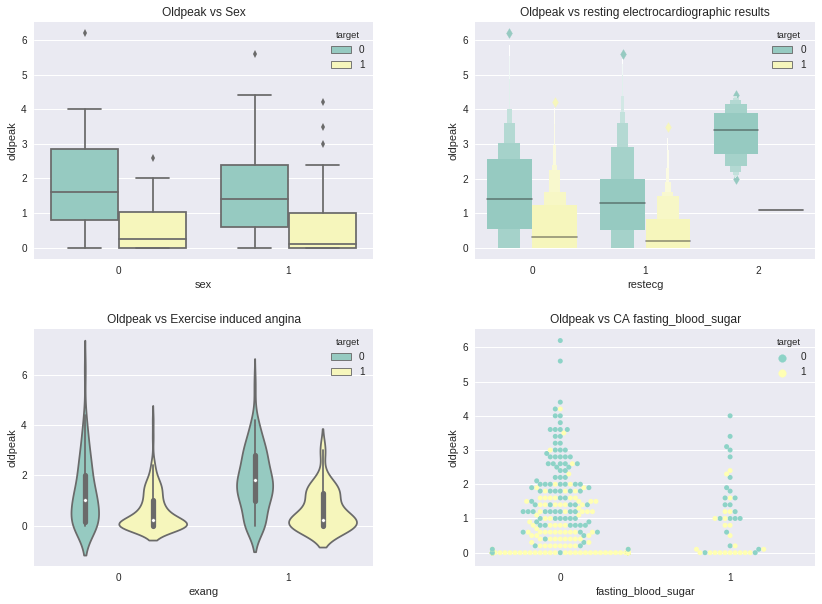

In [38]:
fig,ax = plt.subplots(2,2,figsize=(14,10))
sns.boxplot(y='oldpeak',data=heart_df,x='sex',hue='target', ax=ax[0,0], palette='Set3')
ax[0,0].set_title('Oldpeak vs Sex')
sns.boxenplot(y='oldpeak',data=heart_df,x='restecg',hue='target',ax=ax[0,1], palette='Set3')
ax[0,1].set_title('Oldpeak vs resting electrocardiographic results')
sns.violinplot(y='oldpeak',data=heart_df,x='exang',hue='target',ax=ax[1,0], palette='Set3')
ax[1,0].set_title('Oldpeak vs Exercise induced angina')
sns.swarmplot(y='oldpeak',data=heart_df,x='fasting_blood_sugar',hue='target',ax=ax[1,1], palette='Set3')
ax[1,1].set_title('Oldpeak vs CA fasting_blood_sugar')
plt.subplots_adjust(hspace=0.3, wspace=0.3)

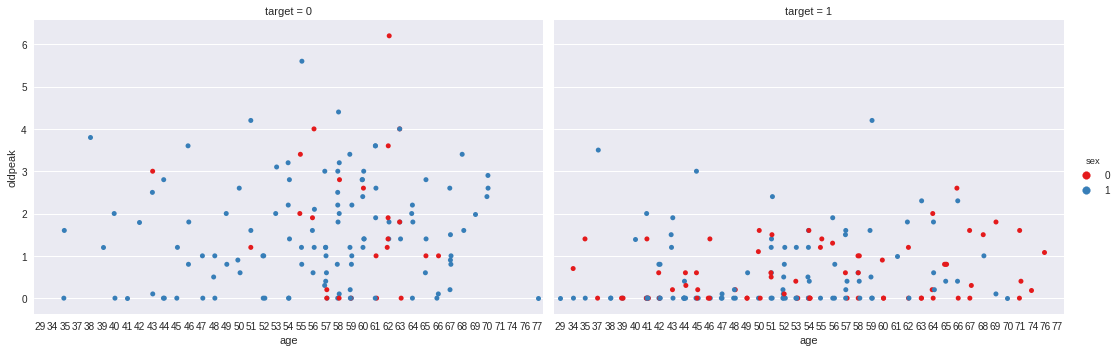

In [39]:
(sns.catplot(y='oldpeak',
             data=heart_df,
             x='age',
             hue='sex',
             col='target',
             palette='Set1',
             height=5, aspect=1.5))

### 2.2.8 cp: chest pain type 

-- Value 1: typical angina, -- Value 2: atypical angina, -- Value 3: non-anginal pain, -- Value 4: asymptomatic 

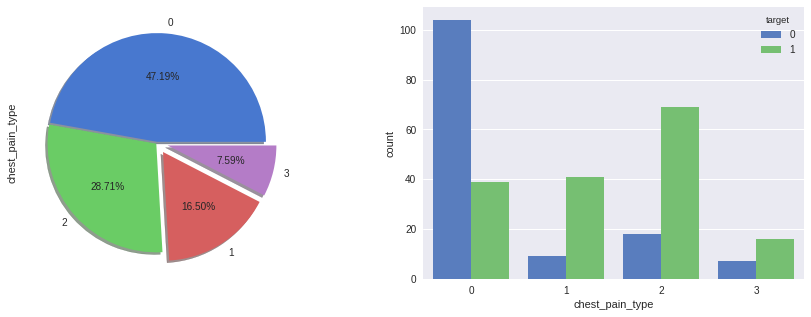

In [40]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.style.use('seaborn-muted')
parameters = {
    'autopct': '%.2f%%',
    'explode': (0.01, 0.01, 0.1, 0.1),
    'shadow': True
}
heart_df.chest_pain_type.value_counts().plot(kind='pie', ax=ax[0], **parameters)
sns.countplot(x='chest_pain_type',data=heart_df,hue='target', ax=ax[1])

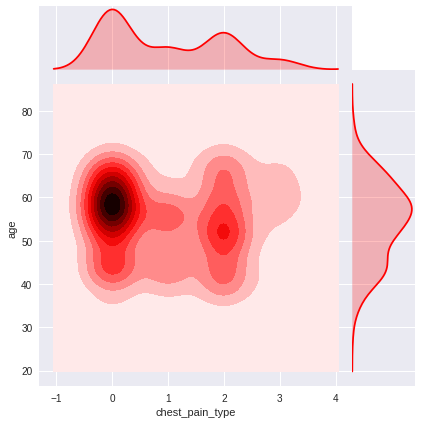

In [41]:
(sns.jointplot("chest_pain_type", "age", data=heart_df,
              kind="kde", space=0, color="r"))

### 2.2.9 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 

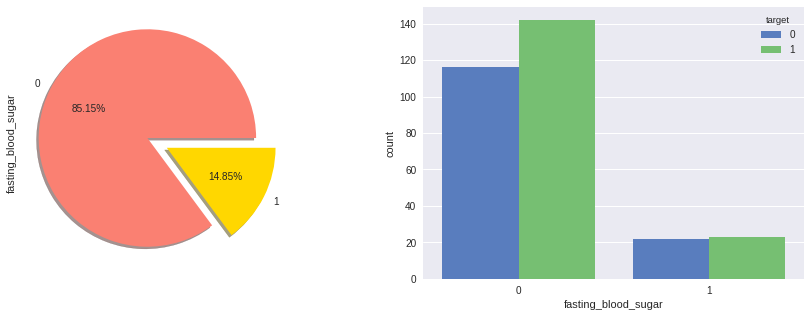

In [42]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
parameters = {
    'autopct': '%.2f%%',
    'explode': (0.1, 0.1),
    'shadow': True,
    'colors': ['salmon', 'gold']
}
heart_df.fasting_blood_sugar.value_counts().plot(kind='pie', ax=ax[0], **parameters)
sns.countplot(x='fasting_blood_sugar',data=heart_df,hue='target', ax=ax[1])

### 2.2.10 restecg: resting electrocardiographic results

-- Value 0: normal

-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

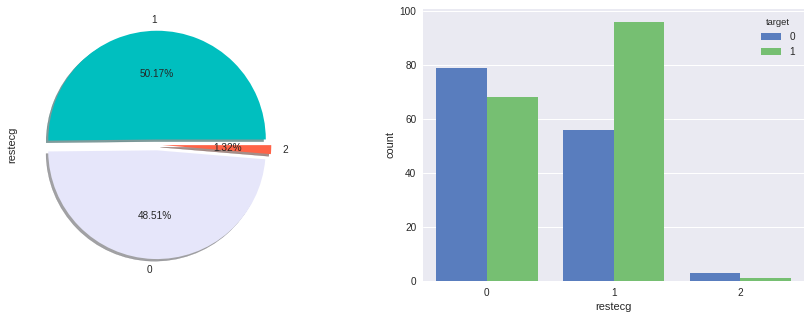

In [52]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
parameters = {
    'autopct': '%.2f%%',
    'explode': (0.05, 0.05, 0.05),
    'shadow': True,
    'colors': ['c', 'lavender', 'tomato']
}
heart_df.restecg.value_counts().plot(kind='pie', ax=ax[0], **parameters)
sns.countplot(x='restecg',data=heart_df,hue='target', ax=ax[1])

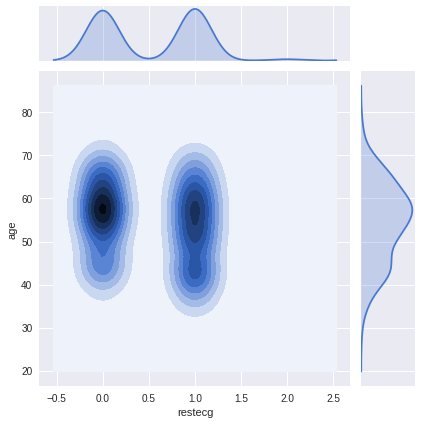

In [53]:
(sns.jointplot("restecg", "age", data=heart_df, kind='kde'))

# 3. Modelling

## 3.1 Splitting  and Scalling Data

In [59]:
heart_df_mod = heart_df.copy()

In [60]:
labels = heart_df_mod.pop('target')

In [61]:
heart_df_mod.shape, labels.shape

((303, 13), (303,))

In [62]:
train_data, test_data, train_labels, test_labels = (train_test_split(heart_df_mod,
                                                                     labels,
                                                                     test_size=0.2,
                                                                     random_state=RANDOM_STATE))

In [11]:
scaler = StandardScaler()

In [64]:
scaled_train_data = scaler.fit_transform(train_data)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [65]:
scaled_test_data = scaler.transform(test_data)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [66]:
feature_columns = heart_df_mod.columns.to_list()

In [67]:
pd.DataFrame(scaled_train_data, columns=feature_columns).describe().T

,count,mean,std,min,25%,50%,75%,max
age,242.0,-9.175397e-18,1.002073,-2.772079,-0.703592,0.112917,0.711689,2.453574
sex,242.0,-8.808381e-17,1.002073,-1.384075,-1.384075,0.722504,0.722504,0.722504
chest_pain_type,242.0,-3.670159e-17,1.002073,-0.971891,-0.971891,0.008099,0.988089,1.968079
resting_blood_pressure,242.0,6.936600e-16,1.002073,-2.165023,-0.616856,-0.021407,0.574042,3.670377
chol,242.0,-2.862724e-16,1.002073,-2.198732,-0.661329,-0.139372,0.529683,6.019728
fasting_blood_sugar,242.0,-7.340318e-18,1.002073,-0.383301,-0.383301,-0.383301,-0.383301,2.608918
restecg,242.0,-1.431362e-16,1.002073,-1.046109,-1.046109,0.843133,0.843133,2.732374
max_heart_rate,242.0,3.229740e-16,1.002073,-2.784687,-0.632816,0.174136,0.700896,2.326007
exang,242.0,-4.037175e-17,1.002073,-0.676632,-0.676632,-0.676632,1.477907,1.477907
oldpeak,242.0,-5.872254e-17,1.002073,-0.920864,-0.920864,-0.193787,0.533290,4.168675


In [68]:
pd.DataFrame(scaled_test_data, columns=feature_columns).describe().T

,count,mean,std,min,25%,50%,75%,max
age,61.0,-0.052170,0.940828,-2.227740,-0.921327,0.058483,0.602822,1.800367
sex,61.0,0.273561,0.869820,-1.384075,0.722504,0.722504,0.722504,0.722504
chest_pain_type,61.0,-0.120424,1.050548,-0.971891,-0.971891,-0.971891,0.988089,1.968079
resting_blood_pressure,61.0,0.373932,1.158605,-1.688664,-0.378676,0.276318,1.169491,4.146736
chol,61.0,-0.054583,0.914027,-2.293633,-0.737250,-0.034980,0.496468,3.077785
fasting_blood_sugar,61.0,0.303438,1.268720,-0.383301,-0.383301,-0.383301,-0.383301,2.608918
restecg,61.0,-0.240858,0.942036,-1.046109,-1.046109,-1.046109,0.843133,0.843133
max_heart_rate,61.0,-0.104402,1.124767,-3.546808,-0.812139,-0.094848,0.801765,1.877700
exang,61.0,0.135735,1.052858,-0.676632,-0.676632,-0.676632,1.477907,1.477907
oldpeak,61.0,0.119094,1.248964,-0.920864,-0.920864,-0.375556,0.805944,4.713983


## 3.2 Helper Functions

In [88]:
# Test data metrics summary 
test_metrics = pd.DataFrame(columns = ['Accuracy score'])

def searchedCV(model,
               model_name,
               searched_model,
               train_data=scaled_train_data,
               test_data=scaled_test_data,
               train_labels=train_labels,
               test_labels=test_labels):

    searched_model.fit(train_data, train_labels)
    
    print('Best params: ', searched_model.best_params_)

    best_model = searched_model.best_estimator_
    best_model.fit(train_data, train_labels)
    
    joblib.dump(best_model, SAVE_PATH + model_name + '.pkl')
    best_model = joblib.load(SAVE_PATH + model_name + '.pkl')
    
    best_model_pred_train = best_model.predict(train_data)
    best_model_pred_test = best_model.predict(test_data)
    best_model_test_acc = accuracy_score(test_labels, best_model_pred_test)
    
    print('Accuracy score:', best_model_test_acc)
    print(confusion_matrix(test_labels, best_model_pred_test))
    print(classification_report(test_labels, best_model_pred_test))

    test_metrics.loc[model_name, 'Accuracy score'] = best_model_test_acc

    return best_model

In [89]:
# Feature importance function
def feature_importance(model, index=heart_df_mod.columns):
    feat_importance = (pd.DataFrame(model.feature_importances_,
                                    index=index,
                                    columns=['importance']).sort_values('importance',ascending=False))
    return feat_importance

In [279]:
# Print confusion matrix in the summary
def print_conf_mat(model):
    conf_matrix = (pd.DataFrame(confusion_matrix(test_labels, model.predict(scaled_test_data)),
                                columns=model.classes_,
                                index=model.classes_))
    return conf_matrix       

## 3.3 ML Modelling

### 3.3.1 RandomForestClassifier - GridSearchCV

In [90]:
forest_param_grid = {
        'max_depth': np.linspace(1, 30, 3).astype(int),    
        'max_features': ['sqrt', 'log2', 0.1, 0.5],
        'min_samples_leaf': np.linspace(1, 20, 3).astype(int),
        'n_estimators': np.linspace(20, 200, 3).astype(int),
}

In [91]:
forest_for_grid_search = RandomForestClassifier(random_state=RANDOM_STATE)

In [92]:
grid_search = GridSearchCV(forest_for_grid_search, forest_param_grid, cv=5, iid=False)

In [93]:
best_forest_gs = searchedCV(forest_for_grid_search, 'Random_Forest_GS', grid_search)

Best params:  {'max_depth': 15, 'max_features': 0.1, 'min_samples_leaf': 1, 'n_estimators': 110}
Accuracy score: 0.8688524590163934
[[26  3]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

   micro avg       0.87      0.87      0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [94]:
feature_importance(best_forest_gs)

,importance
max_heart_rate,0.119417
oldpeak,0.108787
num_of_major_vessels,0.104850
age,0.104154
chol,0.095634
chest_pain_type,0.090448
thal,0.084904
resting_blood_pressure,0.082179
slope,0.068579
exang,0.049540


### 3.3.2 RandomForestClassifier - RandomizedSearchCV

In [95]:
forest_param_grid_rs = {
    'n_estimators': np.arange(10, 300),
    'min_samples_leaf': np.arange(1, 100),
    'max_features': ['sqrt', 'log2', 0.1, 0.5],    
    'max_depth': np.arange(1, 100),
}

In [96]:
forest_for_rs_search = RandomForestClassifier(random_state=RANDOM_STATE)

In [97]:
rs_search = RandomizedSearchCV(forest_for_rs_search, forest_param_grid_rs, cv=5, iid=False)

In [98]:
best_forest_rs = searchedCV(forest_for_rs_search, 'Random_Forest_RS', rs_search)

Best params:  {'n_estimators': 177, 'min_samples_leaf': 5, 'max_features': 0.1, 'max_depth': 13}
Accuracy score: 0.8852459016393442
[[25  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

   micro avg       0.89      0.89      0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [99]:
feature_importance(best_forest_rs)

,importance
thal,0.131814
oldpeak,0.122220
num_of_major_vessels,0.120114
max_heart_rate,0.113801
chest_pain_type,0.092354
slope,0.076707
age,0.076205
exang,0.072824
sex,0.059650
resting_blood_pressure,0.056091


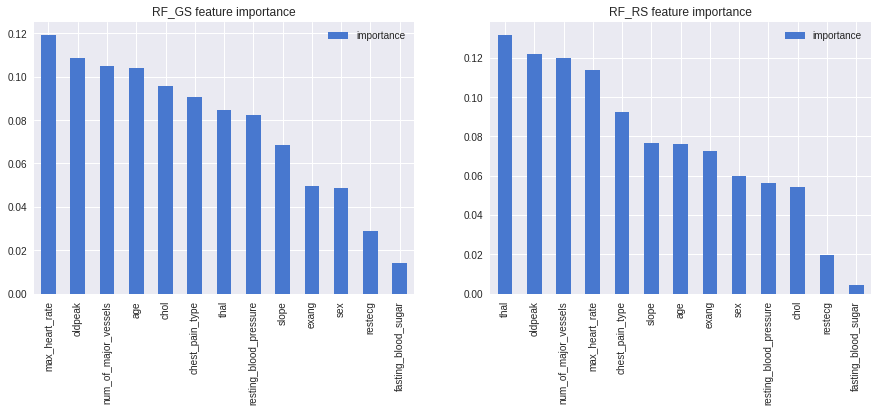

In [100]:
f,axes = plt.subplots(1, 2, figsize=(15,5))
feature_importance(best_forest_gs).plot(kind='bar', ax=axes[0], title='RF_GS feature importance')
feature_importance(best_forest_rs).plot(kind='bar', ax=axes[1], title='RF_RS feature importance')

### 3.3.3 Logistic Regression - GridSearchCV

In [101]:
lr_param_grid = { 
    'C': [0.001, 0.1, 0.3, 1, 100],
    'penalty': ['l1', 'l2'],
}

In [102]:
lr_for_gr_s = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)

In [103]:
lr_gr_search = GridSearchCV(lr_for_gr_s, lr_param_grid, cv=5, iid=False)

In [104]:
best_lr_gr_s = searchedCV(lr_for_gr_s, 'Logistic_Regression_GS', lr_gr_search)

Best params:  {'C': 100, 'penalty': 'l1'}
Accuracy score: 0.8524590163934426
[[25  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

   micro avg       0.85      0.85      0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61




### 3.3.4 Logistic Regression - RandomizedSearchCV

In [105]:
lr_param_grid_rs = { 
    'C': np.arange(0.01, 100),
    'penalty': ['l1', 'l2'],
}

In [106]:
lr_for_rs_s = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)

In [107]:
lr_rs_search = RandomizedSearchCV(lr_for_rs_s, lr_param_grid_rs, cv=5, iid=False)

In [108]:
best_lr_rs_s = searchedCV(lr_for_rs_s, 'Logistic_Regression_RS', lr_rs_search)

Best params:  {'penalty': 'l1', 'C': 83.01}
Accuracy score: 0.8524590163934426
[[25  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

   micro avg       0.85      0.85      0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61




### 3.3.5 ML Modelling accuracy on test data - Accuracy score summary

In [109]:
test_metrics

,Accuracy score
Random_Forest_GS,0.868852
Random_Forest_RS,0.885246
Logistic_Regression_GS,0.852459
Logistic_Regression_RS,0.852459


## 3.4 DNN Modelling

### 3.4.1 DNN Model using train-val-test data

In [68]:
scaled_train_data_nn, val_data_nn, train_labels_nn, val_labels_nn = (train_test_split(scaled_train_data,
                                                                     train_labels,
                                                                     test_size=0.2,
                                                                     random_state=RANDOM_STATE))

In [69]:
scaled_train_data_nn.shape

(193, 13)

In [70]:
val_data_nn.shape

(49, 13)

In [71]:
scaled_test_data.shape

(61, 13)

In [26]:
def build_classifier(n_layers, layer_size, n_classes, final_activation, input_shape):
    layers = [tf.keras.layers.BatchNormalization(input_shape=input_shape)]
    for _ in range(n_layers):
        layers.extend([
            tf.keras.layers.Dense(layer_size, kernel_initializer='he_uniform'),
            tf.keras.layers.LeakyReLU(),
            tf.keras.layers.BatchNormalization(),
        ])
    layers.append(tf.keras.layers.Dense(n_classes, activation=final_activation))    
    return tf.keras.Sequential(layers)

In [246]:
nnc = build_classifier(3, 32, 1, 'sigmoid', scaled_train_data_nn.shape[1:])

In [247]:
nnc.compile(
    optimizer=tf.keras.optimizers.Adam(lr=LR),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
    ]
)

In [248]:
history = nnc.fit(
    scaled_train_data_nn,
    train_labels_nn,
    validation_data=(val_data_nn, val_labels_nn),
    batch_size=BATCH_SIZE,
    epochs=N_EPOCHS,
    shuffle=True,
)

Train on 193 samples, validate on 49 samples
Epoch 1/100
193/193 [==============================] - 1s 5ms/sample - loss: 0.9201 - binary_accuracy: 0.4663 - val_loss: 0.8966 - val_binary_accuracy: 0.5510
Epoch 2/100
193/193 [==============================] - 0s 186us/sample - loss: 0.7398 - binary_accuracy: 0.5959 - val_loss: 0.7490 - val_binary_accuracy: 0.6735
Epoch 3/100
193/193 [==============================] - 0s 177us/sample - loss: 0.6234 - binary_accuracy: 0.6736 - val_loss: 0.6554 - val_binary_accuracy: 0.6939
Epoch 4/100
193/193 [==============================] - 0s 123us/sample - loss: 0.5276 - binary_accuracy: 0.7202 - val_loss: 0.5935 - val_binary_accuracy: 0.7143
Epoch 5/100
193/193 [==============================] - 0s 115us/sample - loss: 0.4983 - binary_accuracy: 0.7409 - val_loss: 0.5559 - val_binary_accuracy: 0.7551
Epoch 6/100
193/193 [==============================] - 0s 142us/sample - loss: 0.4544 - binary_accuracy: 0.7513 - val_loss: 0.5363 - val_binary_accuracy

In [250]:
nnc.save(SAVE_PATH + 'nnc.h5')

In [251]:
nnc = tf.keras.models.load_model(SAVE_PATH + 'nnc.h5')

In [224]:
nnc.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_19 (Batc (None, 13)                52        
_________________________________________________________________
dense_19 (Dense)             (None, 32)                448       
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 32)                0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 32)                128       
_________________________________________________________________
dense_20 (Dense)             (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 32)                0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 32)               

Text(0.5, 1.0, 'Training and Validation accuracy')

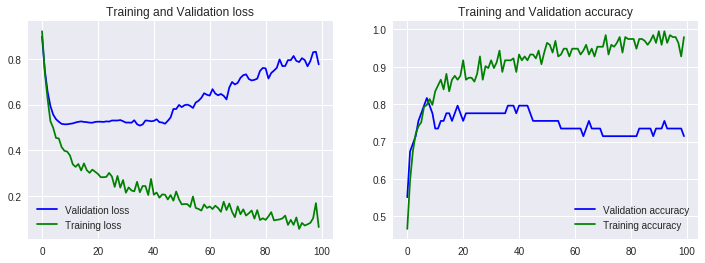

In [261]:
nnc_val_loss_history = history.history['val_loss']
nnc_val_acc_history = history.history['val_binary_accuracy']
f, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(nnc_val_loss_history, 'b', label='Validation loss')
ax[0].plot(history.history['loss'], 'g', label='Training loss')
ax[0].legend()
ax[1].plot(nnc_val_acc_history, 'b', label='Validation accuracy')
ax[1].plot(history.history['binary_accuracy'], 'g', label='Training accuracy')
ax[1].legend()
ax[0].set_title('Training and Validation loss')
ax[1].set_title('Training and Validation accuracy')

In [252]:
test_preds_nn = nnc.predict(scaled_test_data)

In [253]:
print(confusion_matrix(test_labels, test_preds_nn > TRESHOLD))

[[27  2]
 [ 6 26]]


In [254]:
print(classification_report(test_labels, test_preds_nn > TRESHOLD))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

   micro avg       0.87      0.87      0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [255]:
test_acc_nn = accuracy_score(test_labels, test_preds_nn > TRESHOLD)
print('Accuracy score:', test_acc_nn)

Accuracy score: 0.8688524590163934


In [257]:
nnc.evaluate(scaled_test_data, test_labels)

61/61 [==============================] - 0s 2ms/sample - loss: 0.6299 - binary_accuracy: 0.8689


[0.6299335981001619, 0.86885244]

In [256]:
test_metrics.loc['NN', 'Accuracy score'] = test_acc_nn

### 3.4.2 DNN Model using K-fold

Because we have so few data points, the validation set we used is very small. In situations like this we can use K-fold validation.

In [262]:
nnc_kf = build_classifier(2, 32, 1, 'sigmoid', scaled_train_data.shape[1:])

In [263]:
nnc_kf.compile(
    optimizer=tf.keras.optimizers.Adam(lr=LR),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
    ]
)

processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


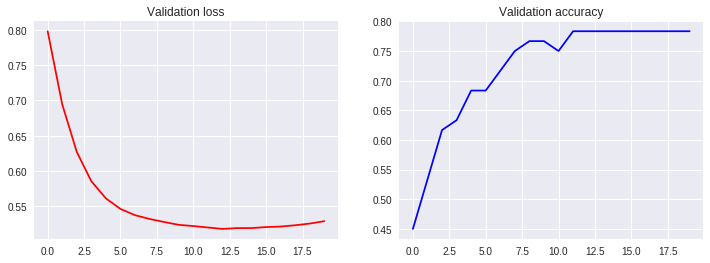

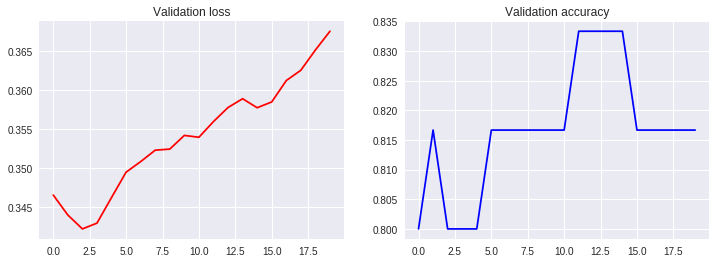

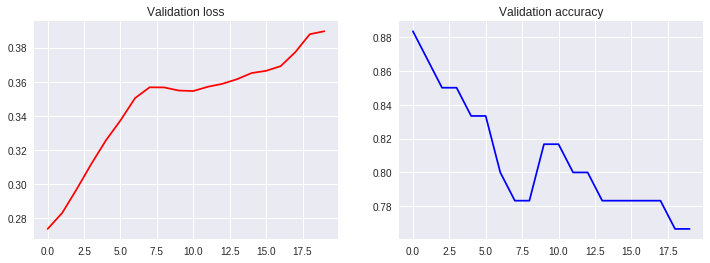

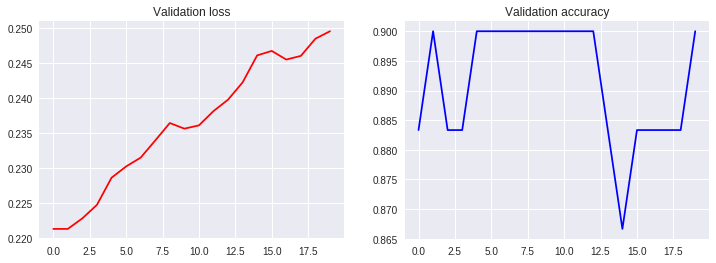

In [265]:
k = 4 # Number of folds
num_val_samples = len(scaled_train_data) // k 
val_loss_histories = []
val_acc_histories = []

for i in range(k):
    print('processing fold #', i + 1)
    val_data = scaled_train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = (np.concatenate([scaled_train_data[:i * num_val_samples],
                                          scaled_train_data[(i + 1) * num_val_samples:]],
                                         axis=0))
    partial_train_labels = (np.concatenate([train_labels[:i * num_val_samples],
                                             train_labels[(i + 1) * num_val_samples:]],
                                            axis=0))
    model = nnc_kf
    history_kf =(model.fit(partial_train_data, partial_train_labels,
                           validation_data=(val_data, val_labels),
                           epochs=N_EPOCHS_KF,
                           batch_size=BATCH_SIZE,
                           verbose=0,))
    val_loss_history = history_kf.history['val_loss']
    val_acc_history = history_kf.history['val_binary_accuracy']
    f, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].plot(val_loss_history, 'r')
    ax[1].plot(val_acc_history, 'b')
    ax[0].set_title('Validation loss')
    ax[1].set_title('Validation accuracy')
    val_loss_histories.append(val_loss_history)
    val_acc_histories.append(val_acc_history)

In [267]:
average_val_loss_history = [np.mean([x[i] for x in val_loss_histories]) for i in range(N_EPOCHS_KF)]

In [268]:
average_val_acc_history = [np.mean([x[i] for x in val_acc_histories]) for i in range(N_EPOCHS_KF)]

Text(0.5, 1.0, 'Validation average accuracy')

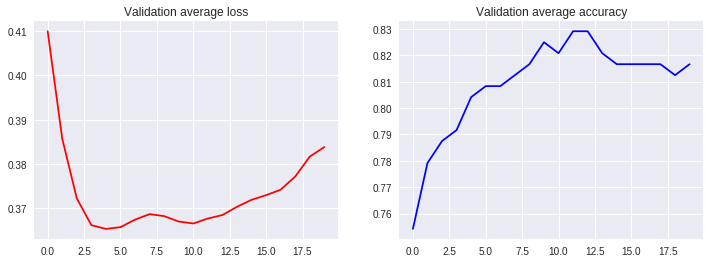

In [269]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(average_val_loss_history, 'r')
ax[1].plot(average_val_acc_history, 'b')
ax[0].set_title('Validation average loss')
ax[1].set_title('Validation average accuracy')

In [270]:
pd.DataFrame({
    'average_val_loss': average_val_loss_history,
    'average_val_accuracy': average_val_acc_history,
    })

,average_val_loss,average_val_accuracy
0,0.409954,0.754167
1,0.385721,0.779167
2,0.372245,0.787500
3,0.366197,0.791667
4,0.365348,0.804167
5,0.365745,0.808333
6,0.367446,0.808333
7,0.368684,0.812500
8,0.368235,0.816667
9,0.367015,0.825000


### 3.4.3 Final DNN Model

In [238]:
final_nnc_model_3 = build_classifier(3, 32, 1, 'sigmoid', scaled_train_data.shape[1:])

In [239]:
final_nnc_model_3.compile(
    optimizer=tf.keras.optimizers.Adam(lr=LR),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
    ]
)

In [240]:
(final_nnc_model_3.fit(
    scaled_train_data,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=13,
    shuffle=True,
))

Train on 242 samples
Epoch 1/13
242/242 [==============================] - 1s 2ms/sample - loss: 0.7697 - binary_accuracy: 0.5620
Epoch 2/13
242/242 [==============================] - 0s 131us/sample - loss: 0.6017 - binary_accuracy: 0.6901
Epoch 3/13
242/242 [==============================] - 0s 115us/sample - loss: 0.5065 - binary_accuracy: 0.7645
Epoch 4/13
242/242 [==============================] - 0s 98us/sample - loss: 0.4389 - binary_accuracy: 0.8140
Epoch 5/13
242/242 [==============================] - 0s 89us/sample - loss: 0.4223 - binary_accuracy: 0.8347
Epoch 6/13
242/242 [==============================] - 0s 84us/sample - loss: 0.3986 - binary_accuracy: 0.8388
Epoch 7/13
242/242 [==============================] - 0s 102us/sample - loss: 0.3953 - binary_accuracy: 0.8554
Epoch 8/13
242/242 [==============================] - 0s 85us/sample - loss: 0.3778 - binary_accuracy: 0.8554
Epoch 9/13
242/242 [==============================] - 0s 89us/sample - loss: 0.3580 - binary_accu

In [282]:
final_nnc_model_3.save(SAVE_PATH + 'final_nnc_model_3.h5')

In [283]:
final_nnc_model_3 = tf.keras.models.load_model(SAVE_PATH + 'final_nnc_model_3.h5')

In [288]:
test_preds_nnc_fin_3 = final_nnc_model_3.predict(scaled_test_data)

In [289]:
print(confusion_matrix(test_labels, test_preds_nnc_fin_3 > TRESHOLD))

[[26  3]
 [ 5 27]]


In [290]:
print(classification_report(test_labels, test_preds_nnc_fin_3 > TRESHOLD))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

   micro avg       0.87      0.87      0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [291]:
test_acc_3 = accuracy_score(test_labels, test_preds_nnc_fin_3 > TRESHOLD)
test_acc_3

0.8688524590163934

In [292]:
final_nnc_model_3.evaluate(scaled_test_data, test_labels)

61/61 [==============================] - 0s 107us/sample - loss: 0.3898 - binary_accuracy: 0.8689


[0.38978219178856394, 0.86885244]

In [293]:
test_metrics.loc['Final_nnc_model_3', 'Accuracy score'] = test_acc_3

### 3.4.4 DNN with K-Fold if scaled continuous data features only

In [162]:
heart_df_mod_1 = heart_df.copy()

In [163]:
labels_1 = heart_df_mod_1.pop('target')

In [164]:
to_scale = ['resting_blood_pressure', 'chol', 'max_heart_rate', 'oldpeak']

In [165]:
scaled_columns = heart_df_mod_1[to_scale]

In [166]:
scaled_1 = scaler.fit_transform(scaled_columns)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [167]:
scaled_columns_df = pd.DataFrame(scaled_1, columns=to_scale)

In [168]:
new_scaled_df = pd.concat([heart_df_mod_1.drop(to_scale, axis=1), scaled_columns_df], axis=1)

In [169]:
scaled_train_data_1, scaled_test_data_1, train_labels_1, test_labels_1 = (train_test_split(new_scaled_df,
                                                                             labels_1,
                                                                             test_size=0.2,
                                                                             random_state=RANDOM_STATE))

In [170]:
nnc_kf_scaled = build_classifier(2, 32, 1, 'sigmoid', scaled_train_data_1.shape[1:])

In [171]:
nnc_kf_scaled.compile(
    optimizer=tf.keras.optimizers.Adam(lr=LR),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
    ]
)

processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


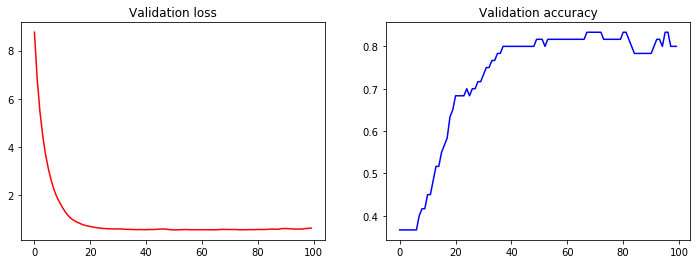

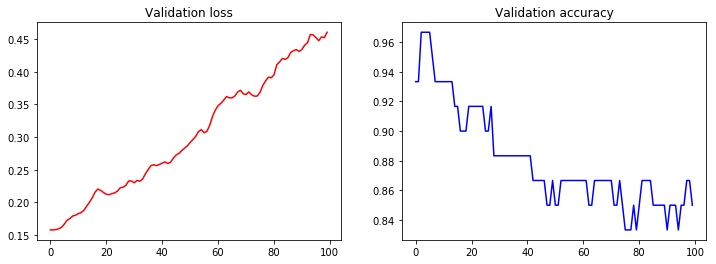

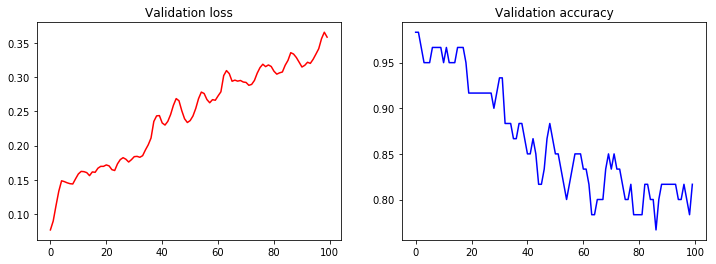

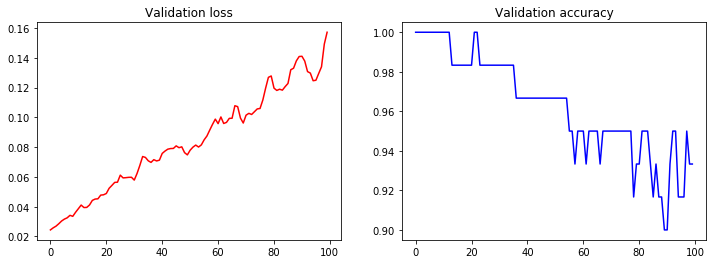

In [172]:
k = 4 # Number of folds
num_val_samples = len(scaled_train_data_1) // k 
val_loss_histories_1 = []
val_acc_histories_1 = []

for i in range(k):
    print('processing fold #', i + 1)
    val_data = scaled_train_data_1[i * num_val_samples: (i + 1) * num_val_samples]
    val_labels = train_labels_1[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = (np.concatenate([scaled_train_data_1[:i * num_val_samples],
                                          scaled_train_data_1[(i + 1) * num_val_samples:]],
                                         axis=0))
    partial_train_labels = (np.concatenate([train_labels_1[:i * num_val_samples],
                                             train_labels_1[(i + 1) * num_val_samples:]],
                                            axis=0))
    model = nnc_kf_scaled
    history_kf_1 =(model.fit(partial_train_data, partial_train_labels,
                           validation_data=(val_data, val_labels),
                           epochs=N_EPOCHS,
                           batch_size=BATCH_SIZE,
                           verbose=0,))
    val_loss_history_1 = history_kf_1.history['val_loss']
    val_acc_history_1 = history_kf_1.history['val_binary_accuracy']
    f, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].plot(val_loss_history_1, 'r')
    ax[1].plot(val_acc_history_1, 'b')
    ax[0].set_title('Validation loss')
    ax[1].set_title('Validation accuracy')
    val_loss_histories_1.append(val_loss_history_1)
    val_acc_histories_1.append(val_acc_history_1)

In [173]:
average_val_loss_history_1 = [np.mean([x[i] for x in val_loss_histories_1]) for i in range(N_EPOCHS)]

In [174]:
average_val_acc_history_1 = [np.mean([x[i] for x in val_acc_histories_1]) for i in range(N_EPOCHS)]

Text(0.5, 1.0, 'Validation average accuracy')

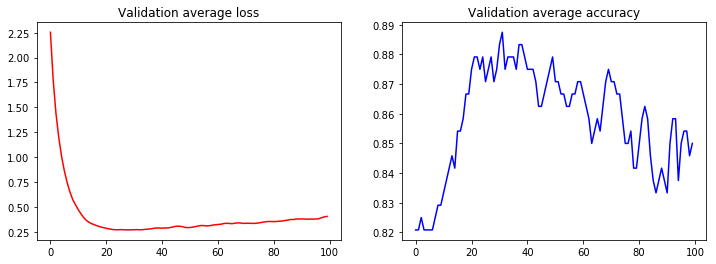

In [175]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(average_val_loss_history_1, 'r')
ax[1].plot(average_val_acc_history_1, 'b')
ax[0].set_title('Validation average loss')
ax[1].set_title('Validation average accuracy')

In [176]:
final_nnc_model_scaled = build_classifier(3, 32, 1, 'sigmoid', scaled_train_data_1.shape[1:])

In [177]:
final_nnc_model_scaled.compile(
    optimizer=tf.keras.optimizers.Adam(lr=LR),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
    ]
)

In [178]:
(final_nnc_model_scaled.fit(
    scaled_train_data_1,
    train_labels_1,
    batch_size=BATCH_SIZE,
    epochs=30,
    shuffle=True,
))

Train on 242 samples
Epoch 1/30
242/242 [==============================] - 1s 2ms/sample - loss: 0.8526 - binary_accuracy: 0.5455
Epoch 2/30
242/242 [==============================] - 0s 150us/sample - loss: 0.7117 - binary_accuracy: 0.6157
Epoch 3/30
242/242 [==============================] - 0s 130us/sample - loss: 0.5266 - binary_accuracy: 0.7521
Epoch 4/30
242/242 [==============================] - 0s 114us/sample - loss: 0.4707 - binary_accuracy: 0.7934
Epoch 5/30
242/242 [==============================] - 0s 107us/sample - loss: 0.4193 - binary_accuracy: 0.7934
Epoch 6/30
242/242 [==============================] - 0s 98us/sample - loss: 0.4022 - binary_accuracy: 0.8223
Epoch 7/30
242/242 [==============================] - 0s 115us/sample - loss: 0.4018 - binary_accuracy: 0.8140
Epoch 8/30
242/242 [==============================] - 0s 93us/sample - loss: 0.3801 - binary_accuracy: 0.8388
Epoch 9/30
242/242 [==============================] - 0s 95us/sample - loss: 0.3686 - binary_ac

In [179]:
final_nnc_model_scaled.save(SAVE_PATH + 'final_nnc_model_scaled.h5')

In [180]:
final_nnc_model_scaled = tf.keras.models.load_model(SAVE_PATH + 'final_nnc_model_scaled.h5')

In [181]:
test_preds_nnc_fin_scaled = final_nnc_model_scaled.predict(scaled_test_data_1)

In [182]:
print(confusion_matrix(test_labels_1, test_preds_nnc_fin_scaled > TRESHOLD))

[[25  4]
 [ 6 26]]


In [183]:
print(classification_report(test_labels_1, test_preds_nnc_fin_scaled > TRESHOLD))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

   micro avg       0.84      0.84      0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [184]:
test_acc_scaled = accuracy_score(test_labels_1, test_preds_nnc_fin_scaled > TRESHOLD)
test_acc_scaled

0.8360655737704918

In [185]:
final_nnc_model_scaled.evaluate(scaled_test_data_1, test_labels_1)

61/61 [==============================] - 0s 2ms/sample - loss: 0.4198 - binary_accuracy: 0.8361


[0.4198032471000171, 0.8360656]

In [204]:
test_metrics.loc['Final_nnc_model_scaled', 'Accuracy score'] = test_acc_scaled

## 4. Results Summary

### 4.1 Accuracy score

In [205]:
test_metrics

,Accuracy score
Random_Forest_GS,0.868852
Random_Forest_RS,0.885246
Logistic_Regression_GS,0.852459
Logistic_Regression_RS,0.852459
NN,0.868852
Final_nnc_model_3,0.868852
Final_nnc_model_scaled,0.836066


### 4.2 Confusion matrix

#### Random_Forest_GS

In [281]:
print_conf_mat(best_forest_gs)

,0,1
0,26,3
1,5,27


#### Random_Forest_RS

In [282]:
print_conf_mat(best_forest_rs)

,0,1
0,25,4
1,3,29


#### Logistic_Regression_GS

In [283]:
print_conf_mat(best_lr_gr_s)

,0,1
0,25,4
1,5,27


#### Logistic_Regression_RS

In [287]:
print_conf_mat(best_lr_rs_s)

,0,1
0,25,4
1,5,27


#### NN	

In [295]:
(pd.DataFrame(confusion_matrix(test_labels, test_preds_nn > TRESHOLD),
              columns=test_labels.unique(),
              index=test_labels.unique()))

,0,1
0,27,2
1,6,26


#### Final_nnc_model_3

In [421]:
(pd.DataFrame(confusion_matrix(test_labels, test_preds_nnc_fin_3 > TRESHOLD),
              columns=test_labels.unique(),
              index=test_labels.unique()))

,0,1
0,26,3
1,5,27


#### Final_nnc_model - if scaled only categorical features

In [206]:
(pd.DataFrame(confusion_matrix(test_labels_1, test_preds_nnc_fin_scaled > TRESHOLD),
              columns=test_labels_1.unique(),
              index=test_labels_1.unique()))

,0,1
0,25,4
1,6,26
